In [ ]:
# Connecting to GDrive
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Checking GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name !='/device:GPU:0':
  raise SystemError("Gpu not")
print('Gpu found at {} '.format(device_name))

Gpu found at /device:GPU:0 


In [ ]:
import pickle

In [ ]:
%cd /content/gdrive/MyDrive/Master/Fall 22/DS Project/CornDataSet
!ls

/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Testing  Training  X_test.pickle  X_train.pickle  Y_test.pickle  Y_train.pickle


In [ ]:
# Loading Pickle Files
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

pickle_in = open("Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

In [ ]:
import numpy as np
image_size = 224
IMG_SHAPE = (image_size, image_size, 3)
y = np.array(Y_train)

In [ ]:
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.layers import Activation, GlobalAveragePooling2D,Dropout
from sklearn.model_selection import KFold, cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import classification_report
from keras.layers.core import Dense, Flatten
from keras.applications import mobilenet_v2
from keras.applications import vgg16
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Input
from keras import optimizers
from keras import Model

import matplotlib.pyplot as plt
import tensorflow as tf
import keras.optimizers
import numpy as np
import pandas as pd
import os

In [ ]:
#Function to Plot Graphs
def plotGraphs(history,fold_no,epochs):
  %cd '/content/gdrive/MyDrive/Graphs/'
 #summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'{fold_no} model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(f'MobileNet_{epochs}epoch_{fold_no}fold_no_accuracyGraph.png')
  plt.show()
  #summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(f'{fold_no} model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(f'MobileNet_{epochs}epoch_{fold_no}fold_no_LossGraph.png')
  plt.show()

Epoch 1/100
73/73 [==============================] - 10s 87ms/step - loss: 0.3581 - accuracy: 0.8580 - val_loss: 15.1837 - val_accuracy: 0.5506
Epoch 2/100
73/73 [==============================] - 5s 74ms/step - loss: 0.2006 - accuracy: 0.9160 - val_loss: 10.7689 - val_accuracy: 0.5961
Epoch 3/100
73/73 [==============================] - 6s 80ms/step - loss: 0.1598 - accuracy: 0.9398 - val_loss: 4.1213 - val_accuracy: 0.7117
Epoch 4/100
73/73 [==============================] - 5s 75ms/step - loss: 0.1620 - accuracy: 0.9416 - val_loss: 13.6999 - val_accuracy: 0.5506
Epoch 5/100
73/73 [==============================] - 6s 79ms/step - loss: 0.1451 - accuracy: 0.9494 - val_loss: 10.5626 - val_accuracy: 0.6325
Epoch 6/100
73/73 [==============================] - 5s 74ms/step - loss: 0.0972 - accuracy: 0.9610 - val_loss: 15.7624 - val_accuracy: 0.5597
Epoch 7/100
73/73 [==============================] - 6s 76ms/step - loss: 0.0587 - accuracy: 0.9784 - val_loss: 15.9030 - val_accuracy: 0.5623

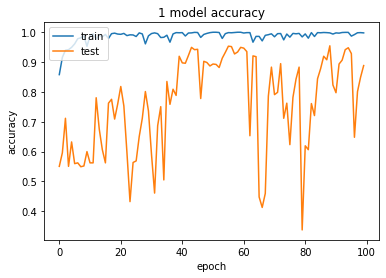

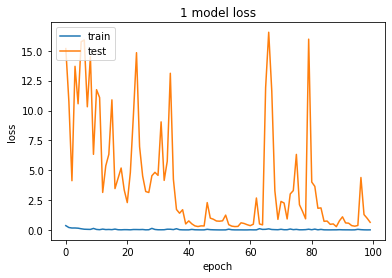

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet_100/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 1: loss of 0.3893616497516632; accuracy of 92.3701286315918%
49/49 [==============================] - 5s 66ms/step
Classification report on Training data fold-1:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88       928
           1       0.83      1.00      0.91       954
           2       0.94      0.96      0.95       410
           3       0.98      0.96      0.97       788

    accuracy                           0.92      3080
   macro avg       0.94      0.93      0.93      3080
weighted avg       0.93      0.92      0.92      3080

13/13 [==============================] - 1s 84ms/step
Classification report on Test data:-1
              precision    recall  f1-score   support

           0       0.98      0.75  

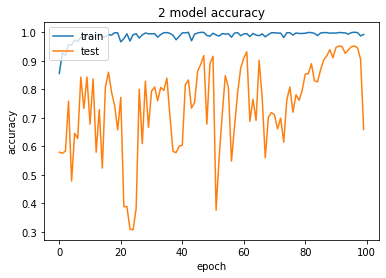

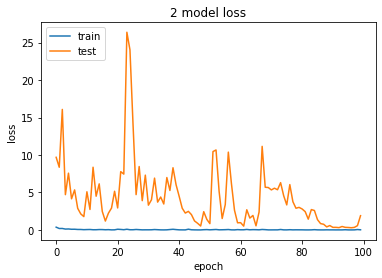

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet_100/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 2: loss of 1.5434634685516357; accuracy of 72.07792401313782%
49/49 [==============================] - 4s 67ms/step
Classification report on Training data fold-2:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       928
           1       0.88      0.20      0.33       954
           2       0.71      0.98      0.82       410
           3       0.45      0.80      0.58       788

    accuracy                           0.69      3080
   macro avg       0.76      0.73      0.68      3080
weighted avg       0.78      0.69      0.65      3080

13/13 [==============================] - 1s 65ms/step
Classification report on Test data:-2
              precision    recall  f1-score   support

           0       1.00      0.94 

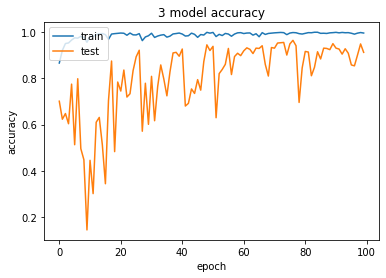

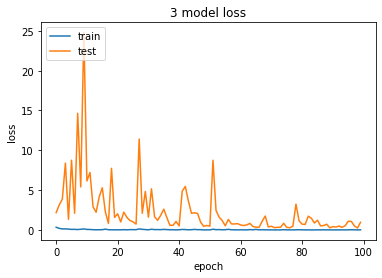

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet_100/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 3: loss of 0.30938097834587097; accuracy of 95.94155550003052%
49/49 [==============================] - 4s 68ms/step
Classification report on Training data fold-3:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       928
           1       1.00      1.00      1.00       954
           2       0.99      0.68      0.81       410
           3       0.86      1.00      0.92       788

    accuracy                           0.96      3080
   macro avg       0.96      0.92      0.93      3080
weighted avg       0.96      0.96      0.95      3080

13/13 [==============================] - 1s 66ms/step
Classification report on Test data:-3
              precision    recall  f1-score   support

           0       1.00      1.00

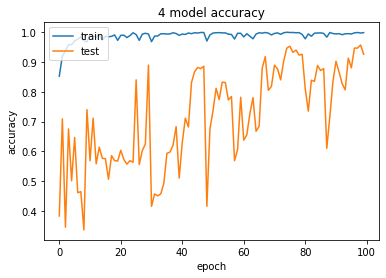

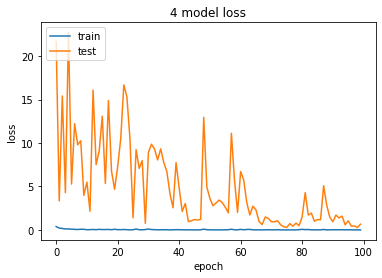

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet_100/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 4: loss of 0.17145124077796936; accuracy of 97.07792401313782%
49/49 [==============================] - 4s 67ms/step
Classification report on Training data fold-4:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       928
           1       1.00      1.00      1.00       954
           2       1.00      0.81      0.89       410
           3       0.91      0.99      0.95       788

    accuracy                           0.97      3080
   macro avg       0.98      0.95      0.96      3080
weighted avg       0.97      0.97      0.97      3080

13/13 [==============================] - 1s 65ms/step
Classification report on Test data:-4
              precision    recall  f1-score   support

           0       1.00      1.00

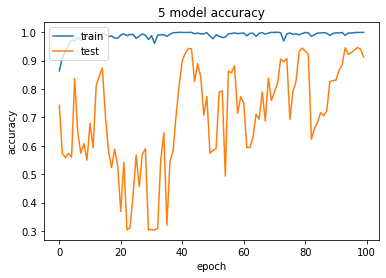

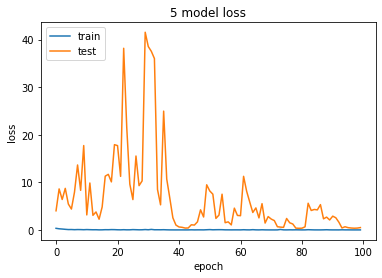

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet_100/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 5: loss of 0.2097712606191635; accuracy of 95.29221057891846%
49/49 [==============================] - 4s 66ms/step
Classification report on Training data fold-5:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       928
           1       1.00      0.99      1.00       954
           2       0.78      0.98      0.87       410
           3       0.95      0.97      0.96       788

    accuracy                           0.95      3080
   macro avg       0.93      0.96      0.94      3080
weighted avg       0.96      0.95      0.95      3080

13/13 [==============================] - 1s 69ms/step
Classification report on Test data:-5
              precision    recall  f1-score   support

           0       1.00      0.85 

In [ ]:
inputs = X_train
targets = y
acc_per_fold = []
loss_per_fold = []
num_folds = 5
epochs = 100

kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train, test in kfold.split(inputs, targets):
  base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

  CLASSES = 4
  x = base_model.output
  x = GlobalAveragePooling2D(name='avg_pool')(x)
  x = Dropout(0.4)(x)
  predictions = Dense(CLASSES, activation='softmax')(x)
  model = Model(inputs=base_model.input, outputs=predictions)

  for layer in model.layers[0:int(len(model.layers)/2)]:
    layer.trainable = False  

  for layer in model.layers[int(len(model.layers)/2):]:
    layer.trainable = True  

  optm = optimizers.Adam(learning_rate=0.001)    
  model.compile(loss='sparse_categorical_crossentropy',
              optimizer= optm,
              metrics=['accuracy']
              )

  logs = f'/content/gdrive/MyDrive/Logs/MobileNet_Kfold/MobileNet_{epochs}/fold_no_{fold_no}/'
  
  history = model.fit(inputs, targets, batch_size=32, epochs=epochs, validation_split=0.25, callbacks= [TensorBoard
                          (log_dir=logs , histogram_freq=0,
                          write_graph=True, write_images=False)],
                          use_multiprocessing=True)
  
  plotGraphs(history,fold_no,epochs)
  
  %cd f'/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet_{epochs}/'
  hist_df = pd.DataFrame(history.history)  
  hist_csv_file = f'MobileNet_Kfold_history_{fold_no}.csv'
  with open(hist_csv_file, mode='w') as f:
      hist_df.to_csv(f)

  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  y_train_pred = model.predict(X_train, batch_size=64, verbose=1)
  y_train_pred_bool = np.argmax(y_train_pred, axis=1)
  print(f"Classification report on Training data fold-{fold_no}:")
  print(classification_report(y, y_train_pred_bool))

  y_pred = model.predict(X_test, batch_size=64, verbose=1)
  y_pred_bool = np.argmax(y_pred, axis=1)
  print(f"Classification report on Test data:-{fold_no}")
  print(classification_report(Y_test, y_pred_bool))

  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Validation Loss: {loss_per_fold[i]} - Validation Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------') 